# Seleção de Features

## Importando os dados

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
CSV_URL = 'https://raw.githubusercontent.com/allanspadini/dados-com-muitas-dimensoes/main/dados/hotel.csv'

In [3]:
df_hotel = pd.read_csv(CSV_URL)
df_hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1


In [4]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   required_car_parking_space            34146 non-null  int64  
 5   lead_time                             34146 non-null  int64  
 6   arrival_year                          34146 non-null  int64  
 7   arrival_month                         34146 non-null  int64  
 8   arrival_date                          34146 non-null  int64  
 9   repeated_guest                        34146 non-null  int64  
 10  no_of_previous_cancellations          34146 non-null  int64  
 11  no_of_previous_

In [5]:
X = df_hotel.drop('booking_status', axis=1)
Y = df_hotel['booking_status']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
  x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                      random_state=0,
                                                      test_size=.3,
                                                      stratify=Y)

In [8]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9192698164779383

## EDA

<Axes: xlabel='booking_status', ylabel='arrival_month'>

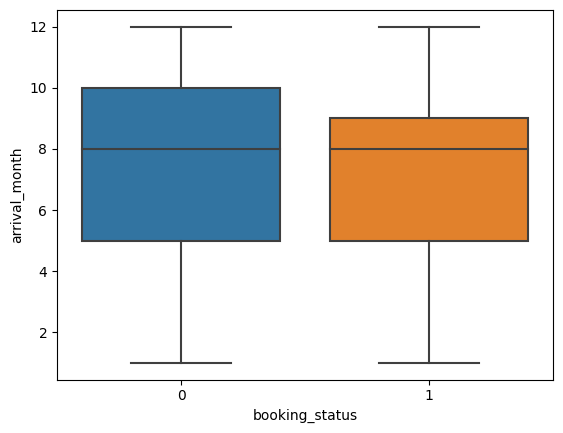

In [9]:
sns.boxplot(x_train, x=y_train, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='arrival_month'>

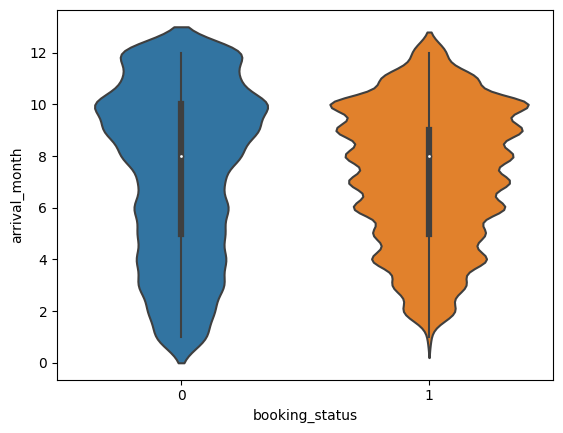

In [10]:
sns.violinplot(x_train, x=y_train, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='lead_time'>

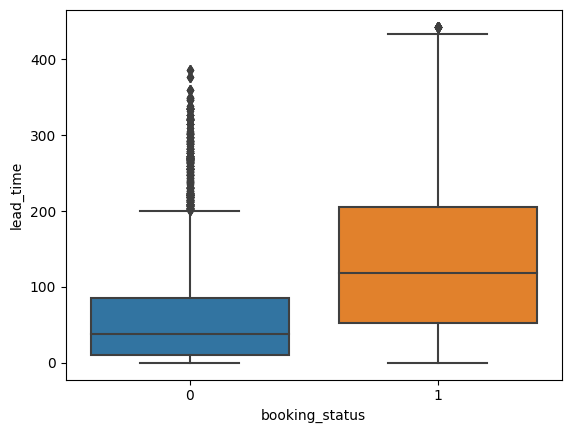

In [11]:
sns.boxplot(x_train, x=y_train, y='lead_time')

<Axes: >

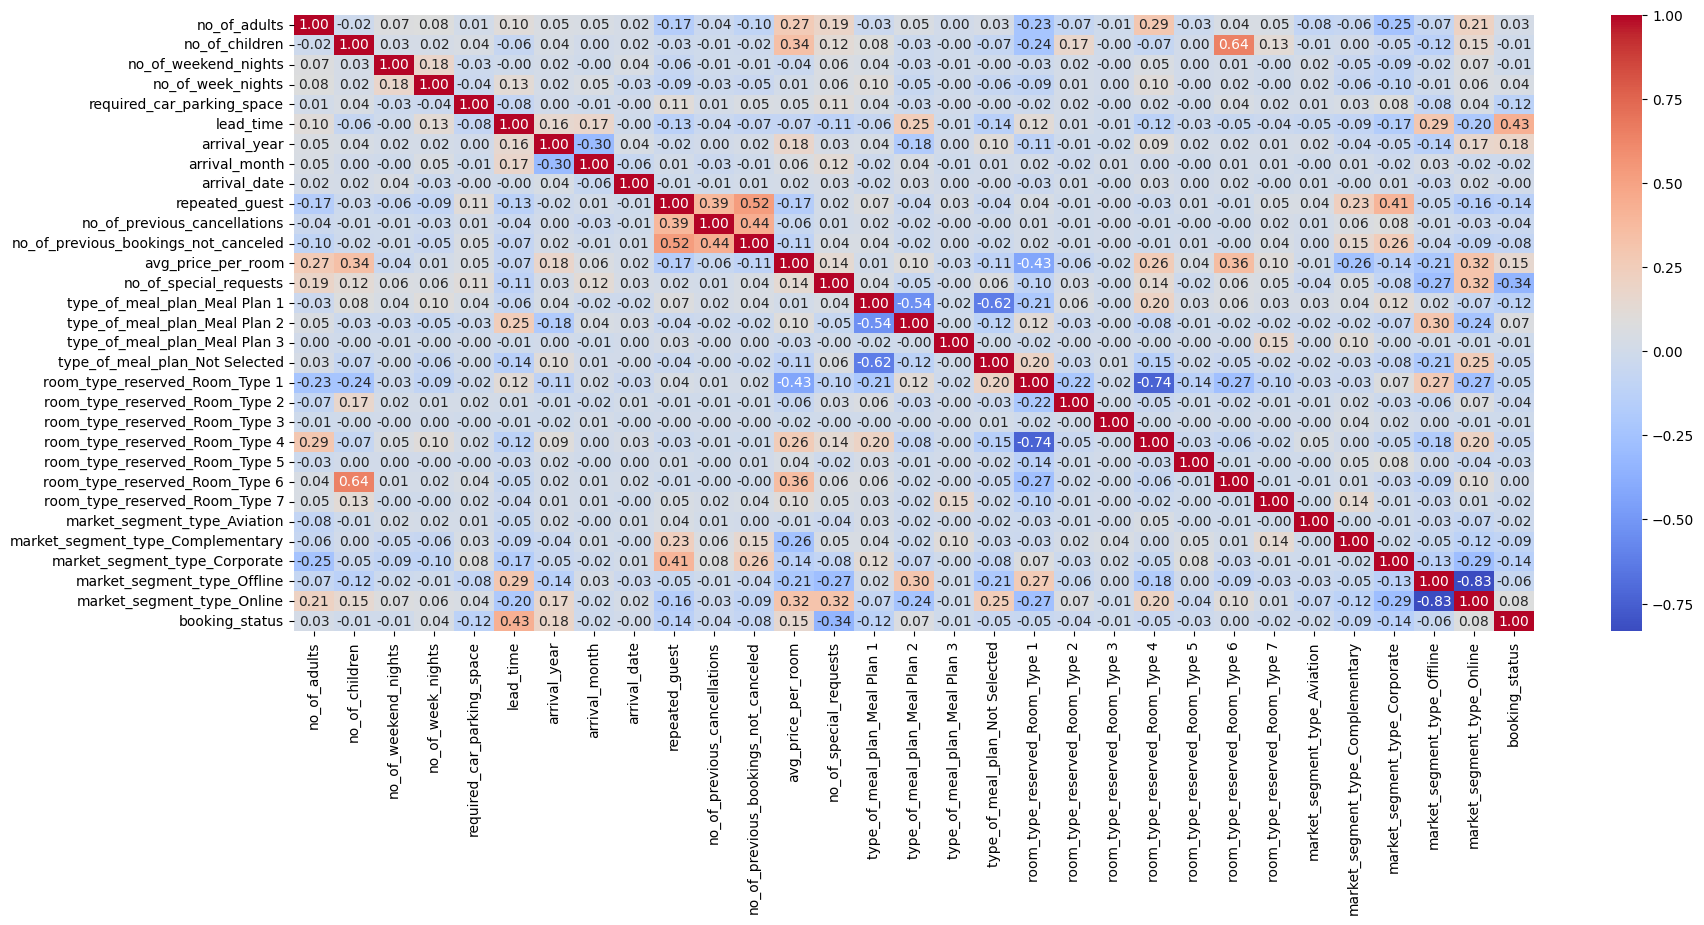

In [12]:
plt.figure(figsize=(20, 8))
sns.heatmap(pd.concat([x_train, y_train], axis=1).corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f')

In [13]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train)
print('Accr: %.2f' % model.score(x_test, y_test))

Accr: 0.92


In [14]:
importance = pd.DataFrame({
    'Columns': x_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

[Text(0, 0, 'lead_time'),
 Text(1, 0, 'no_of_special_requests'),
 Text(2, 0, 'avg_price_per_room'),
 Text(3, 0, 'arrival_month'),
 Text(4, 0, 'arrival_date'),
 Text(5, 0, 'no_of_week_nights'),
 Text(6, 0, 'no_of_weekend_nights'),
 Text(7, 0, 'market_segment_type_Offline'),
 Text(8, 0, 'arrival_year'),
 Text(9, 0, 'market_segment_type_Online')]

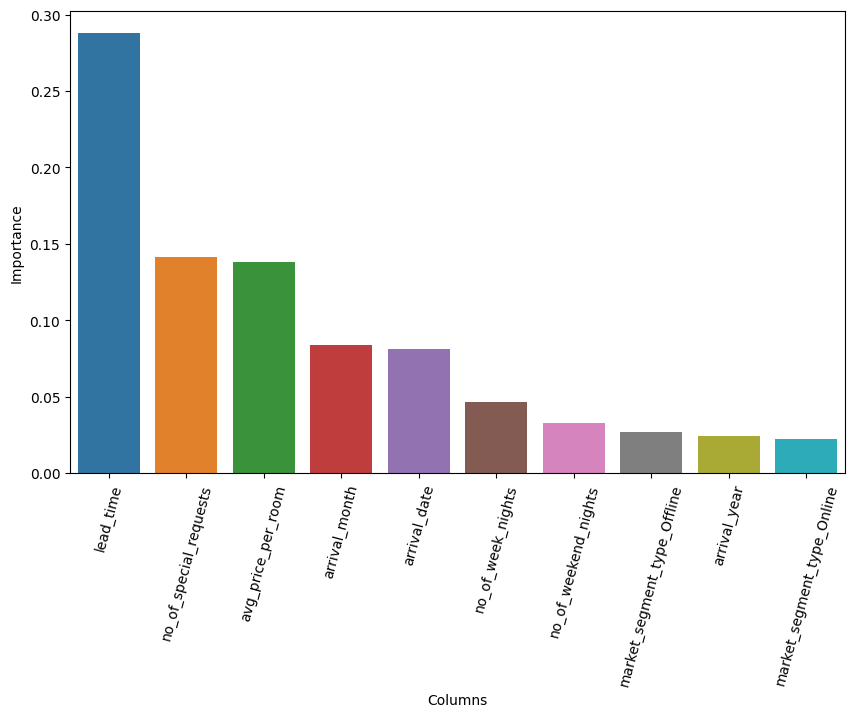

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(importance.head(10),
            x='Columns',
            y='Importance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

## Automatizando a seleção

In [16]:
from sklearn.feature_selection import SelectFromModel

In [17]:
model_features_selected = SelectFromModel(model,
                                          max_features=10,
                                          prefit=True)

In [18]:
x_train_selected = model_features_selected.transform(x_train)
x_test_selected = model_features_selected.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [19]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train_selected, y_train)
print('Accr %.2f%%' % (model.score(x_test_selected, y_test) * 100))

Accr 89.54%


In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
model = RandomForestClassifier(random_state=0)

In [22]:
cv_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [23]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=cv_param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [24]:
model_features_selected = SelectFromModel(grid_search.best_estimator_,
                                          max_features=10,
                                          prefit=True)

In [25]:
x_train_selected = model_features_selected.transform(x_train)
x_test_selected = model_features_selected.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [26]:
model = grid_search.best_estimator_
model.fit(x_train_selected, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [27]:
print('Accr %.2f%%' % (model.score(x_test_selected, y_test)))

Accr 0.90%


## Avaliando - Confusion matrix

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

In [29]:
y_hat = model.predict(x_test_selected)

Text(0.5, 1.0, 'Confusion matrix')

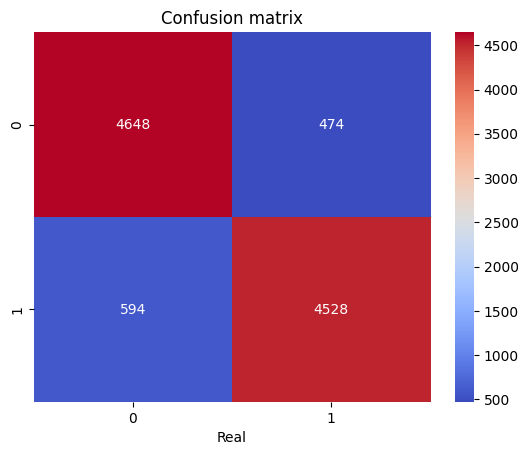

In [30]:
sns.heatmap(confusion_matrix(y_test, y_hat),
            annot=True,
            cmap='coolwarm',
            fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Real')
plt.title('Confusion matrix')

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)

In [32]:
roc_auc = auc(fpr, tpr)

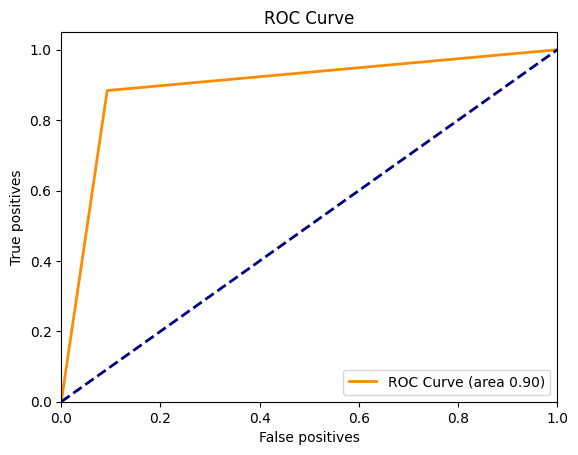

In [33]:
plt.figure()
plt.plot(fpr, tpr,
         color='darkorange',
         lw=2,
         label='ROC Curve (area %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],
         color='navy',
         lw=2,
         linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False positives')
plt.ylabel('True positives')

plt.title('ROC Curve')
plt.legend(loc='lower right')

## Seleção com RFE

In [34]:
from sklearn.feature_selection import RFE

In [35]:
model = RandomForestClassifier(random_state=0,
                               **grid_search.best_params_)

In [36]:
select_rfe = RFE(model,
                 n_features_to_select=10,
                 step=1)
select_rfe.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=200, random_state=0),
    n_features_to_select=10)

In [37]:
x_train_selected = select_rfe.transform(x_train)
x_test_selected = select_rfe.transform(x_test)

In [38]:
model.fit(x_train_selected, y_train)
print('Accr %.2f%%' % (model.score(x_test_selected, y_test) * 100))

Accr 90.97%


In [39]:
model.fit(x_train_selected, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [40]:
y_hat = model.predict(x_test_selected)

Text(0.5, 1.0, 'Confusion matrix')

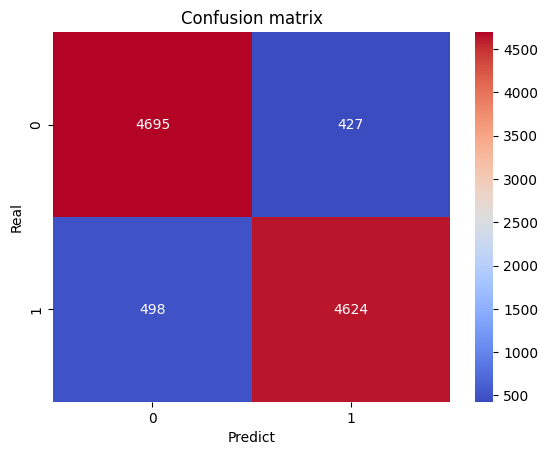

In [41]:
sns.heatmap(confusion_matrix(y_test, y_hat),
            annot=True,
            cmap='coolwarm',
            fmt='d')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.title('Confusion matrix')

## Seleção RFECV

In [42]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [43]:
from tokenize import STAREQUAL
rfecv = RFECV(estimator=model,
              step=1,
              cv=StratifiedKFold(5, shuffle=True, random_state=0),
              scoring='roc_auc',
              min_features_to_select=1,
              importance_getter='auto')

In [44]:
rfecv.fit(x_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
      estimator=RandomForestClassifier(n_estimators=200, random_state=0),
      scoring='roc_auc')

In [47]:
print('Ideal number of features %d' % rfecv.n_features_)
print('Ideal number of features ', np.unique(rfecv.ranking_))
print('Ideal number of features ', rfecv.cv_results_)

Ideal number of features 25
Ideal number of features  [1 2 3 4 5 6]
Ideal number of features  {'mean_test_score': array([0.75252464, 0.88031385, 0.90716785, 0.94670693, 0.95748906,
       0.95988408, 0.96467457, 0.96524371, 0.96713953, 0.96774933,
       0.96811166, 0.96883578, 0.96828106, 0.96880529, 0.96899813,
       0.97006604, 0.97080747, 0.97109823, 0.97088116, 0.97107053,
       0.97117333, 0.97111839, 0.97121856, 0.97142469, 0.97206682,
       0.97196381, 0.97188557, 0.97151138, 0.97182876, 0.97157631]), 'std_test_score': array([0.02481698, 0.00370431, 0.00558622, 0.00422732, 0.00383881,
       0.00335171, 0.00290808, 0.00257528, 0.00317265, 0.00293376,
       0.00269478, 0.00313089, 0.00291449, 0.0033819 , 0.00330848,
       0.00339256, 0.00337352, 0.00323101, 0.00320694, 0.00331143,
       0.00346808, 0.00324957, 0.00318613, 0.00336818, 0.00339194,
       0.00324273, 0.00340087, 0.00342991, 0.00335012, 0.00350508]), 'split0_test_score': array([0.7724937 , 0.88472497, 0.911748

In [48]:
y_pred = rfecv.predict(x_test)

<Axes: >

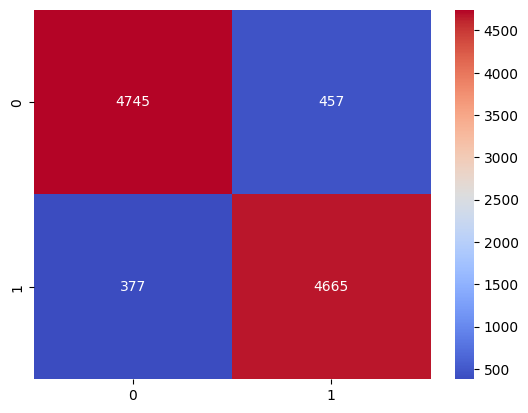

In [49]:
sns.heatmap(confusion_matrix(y_pred, y_test),
            annot=True,
            cmap='coolwarm',
            fmt='d')

In [50]:
df_rfecv = pd.DataFrame({
  'Values': rfecv.cv_results_['mean_test_score']
})

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30')]

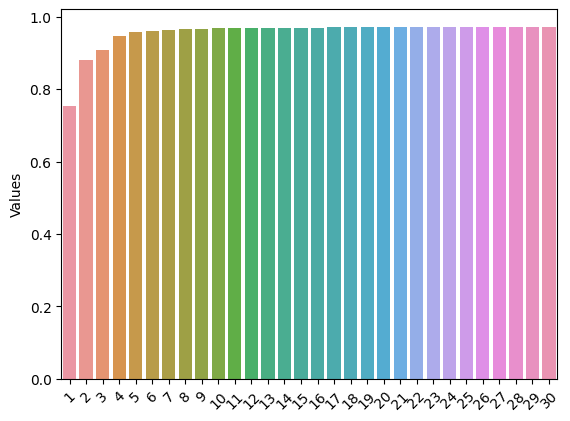

In [52]:
ax = sns.barplot(df_rfecv,
            x=df_rfecv.index + 1,
            y='Values')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## Desafio

In [53]:
CSV_URL_ATV = 'https://raw.githubusercontent.com/allanspadini/selecao-de-features/main/dados/pistachio.csv'

  ### Primeira parte

1. Nesse desafio vamos trabalhar com dados voltados para a classificação de tipos de pistache. Nessa primeira etapa do desafio quero que você visualize as primeiras linhas do dataset , verifique a presença de dados nulos e mapeie a classe Kirmizi_Pistachio para o valor 0 e a Siit_Pistachio para o valor 1.

In [54]:
import pandas as pd

In [55]:
df_pist = pd.read_csv(CSV_URL_ATV)
df_pist.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [56]:
print('N null values: %d ' % df_pist.isnull().sum().sum())

N null values: 0 


In [57]:
print('Class: ', df_pist['Class'].unique())
df_pist.replace({
    'Kirmizi_Pistachio': 0,
    'Siit_Pistachio': 1
}, inplace=True)
print('Class: ', df_pist['Class'].unique())

Class:  ['Kirmizi_Pistachio' 'Siit_Pistachio']
Class:  [0 1]


In [58]:
df_pist['Class'].value_counts(normalize=True) * 100

0    58.090803
1    41.909197
Name: Class, dtype: float64

2. Depois disso realize uma análise exploratória dos dados para identificar features que sejam importantes para o processo de classificação. Você pode gerar boxplots para comparar diferentes features e também gerar uma matriz de correlação para verificar a correlação das features entre si e entre a coluna da classe de pistache. Para isso, separe os dados em treino e teste e construa esses gráficos com base nos dados de treino.

In [59]:
X, Y = df_pist.drop('Class', axis=1), df_pist['Class']

In [60]:
X, x_test, Y, y_test = train_test_split(X, Y,
                                        random_state=0,
                                        test_size=.25,
                                        stratify=Y)
x_train, x_val, y_train, y_val = train_test_split(X, Y,
                                        random_state=0,
                                        test_size=.25,
                                        stratify=Y)

<Axes: xlabel='Class', ylabel='AREA'>

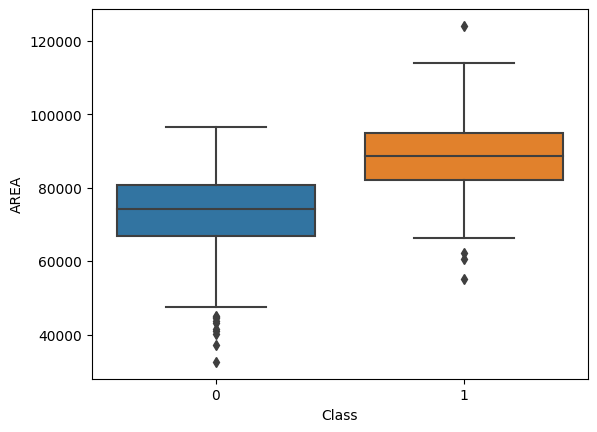

In [61]:
sns.boxplot(x_train, x=y_train, y='AREA')

<Axes: xlabel='Class', ylabel='EQDIASQ'>

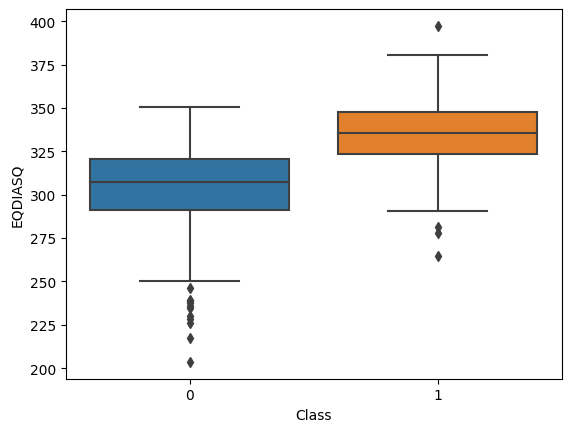

In [62]:
sns.boxplot(x_train, x=y_train, y='EQDIASQ')

<Axes: >

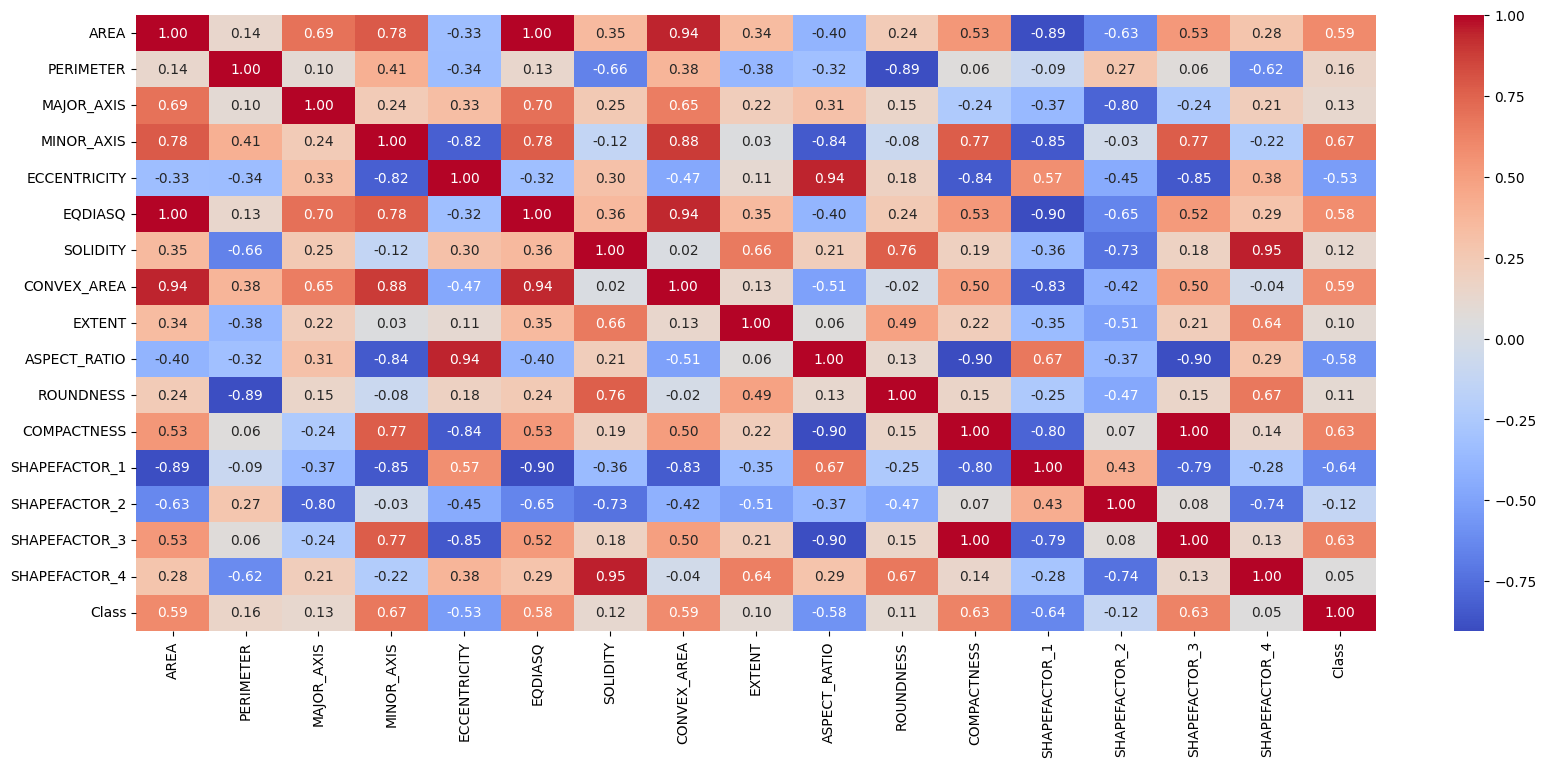

In [63]:
plt.figure(figsize=(20, 8))
sns.heatmap(pd.concat([x_train, y_train], axis=1).corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f')

3. Por fim, treine um modelo do tipo RandomForestClassifier e visualize as 10 features mais importantes obtidas a partir do modelo.

In [64]:
len(x_val.columns)

16

In [65]:
model_rf1 = RandomForestClassifier(random_state=0)
model_rf1.fit(x_train, y_train)
print('Accr: %.2f%%' % (model_rf1.score(x_val, y_val) * 100))

Accr: 90.06%


### Segunda parte

1. Continuando o desafio proposto na Aula 2, agora você deve aproveitar o modelo criado com a RandomForest e selecionar as melhores features. Com as features selecionadas, treine um novo modelo e estime o score sobre os dados de teste. Use o GridSearchCV para uma escolha mais robusta dos parâmetros do modelo.

In [81]:
select_rfe = RFE(model_rf1,
                 step=1)

In [82]:
select_rfe.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=0))

In [83]:
x_train_selected = select_rfe.transform(x_train)
x_val_selected = select_rfe.transform(x_val)
x_test_selected = select_rfe.transform(x_test)

In [89]:
cv_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [90]:
model_rf2 = RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(estimator=model_rf2,
                       param_grid=cv_param_grid,
                       cv=StratifiedKFold(random_state=0,
                                          n_splits=5,
                                          shuffle=True),
                       scoring='accuracy',
                       n_jobs=-1)
grid_cv.fit(x_train_selected, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={}, scoring='accuracy')

In [91]:
print('Accr: %.2f%%' % (grid_cv.score(x_val_selected, y_val) * 100))

Accr: 88.82%


### Terceira parte

1. Tente realizar a seleção de features em conjunto com a validação cruzada. Ao final do processo, obtenha o número ideal de features e o ranking das features. Também construa uma matriz de confusão para mostrar a performance do modelo treinado sobre os dados de teste.

In [94]:
rfecv = RFECV(estimator=grid_cv.best_estimator_,
              step=1,
              cv=StratifiedKFold(random_state=0,
                                 n_splits=5,
                                 shuffle=True),
              scoring='roc_auc',
              min_features_to_select=1,
              importance_getter='auto')
rfecv.fit(x_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
      estimator=RandomForestClassifier(random_state=0), scoring='roc_auc')

In [95]:
print('Ideal number of features: %d' % rfecv.n_features_)
print('Ideal number of features: ', np.unique(rfecv.ranking_))
print('Ideal number of features: ', rfecv.cv_results_)

Ideal number of features: 14
Ideal number of features:  [1 2 3]
Ideal number of features:  {'mean_test_score': array([0.86839473, 0.9050924 , 0.92349893, 0.92163586, 0.92231343,
       0.92310503, 0.92785562, 0.93268552, 0.92943766, 0.93187762,
       0.93113119, 0.92763682, 0.92983994, 0.93317745, 0.93268386,
       0.93145153]), 'std_test_score': array([0.02883511, 0.01043437, 0.01382715, 0.01449131, 0.01471014,
       0.01525862, 0.01547284, 0.0101456 , 0.01046656, 0.01215516,
       0.01187948, 0.01291402, 0.01227761, 0.01218057, 0.0101615 ,
       0.01079859]), 'split0_test_score': array([0.87179067, 0.91986234, 0.92701846, 0.92712772, 0.92423249,
       0.92537966, 0.93171638, 0.93067847, 0.92232055, 0.92630831,
       0.92456025, 0.92461488, 0.92543428, 0.9329728 , 0.93160712,
       0.92417787]), 'split1_test_score': array([0.90316358, 0.89803792, 0.93182319, 0.93099647, 0.92934303,
       0.92653219, 0.92735891, 0.93634259, 0.93127205, 0.93435847,
       0.93584656, 0.93237434

In [97]:
model_rf3 = grid_cv.best_estimator_
y_hat = model_rf3.predict(x_test_selected)

Accr: 85.35%
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       250
           1       0.82      0.83      0.83       180

    accuracy                           0.85       430
   macro avg       0.85      0.85      0.85       430
weighted avg       0.85      0.85      0.85       430



<Axes: >

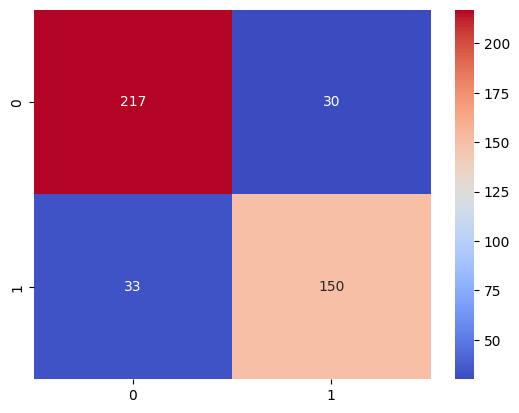

In [104]:
print('Accr: %.2f%%' % (model_rf3.score(x_test_selected, y_test) * 100))
print(classification_report(y_test, y_hat))
sns.heatmap(confusion_matrix(y_hat, y_test),
            annot=True,
            cmap='coolwarm',
            fmt='d')